In [7]:
!pip install langchain --quiet
!pip install lime --quiet
!pip install openai --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install seaborn --quiet
!pip install shap --quiet
!pip install transformers --quiet
!pip install torch --quiet
!pip install wordcloud --quiet

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
github_url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df = pd.read_csv(github_url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


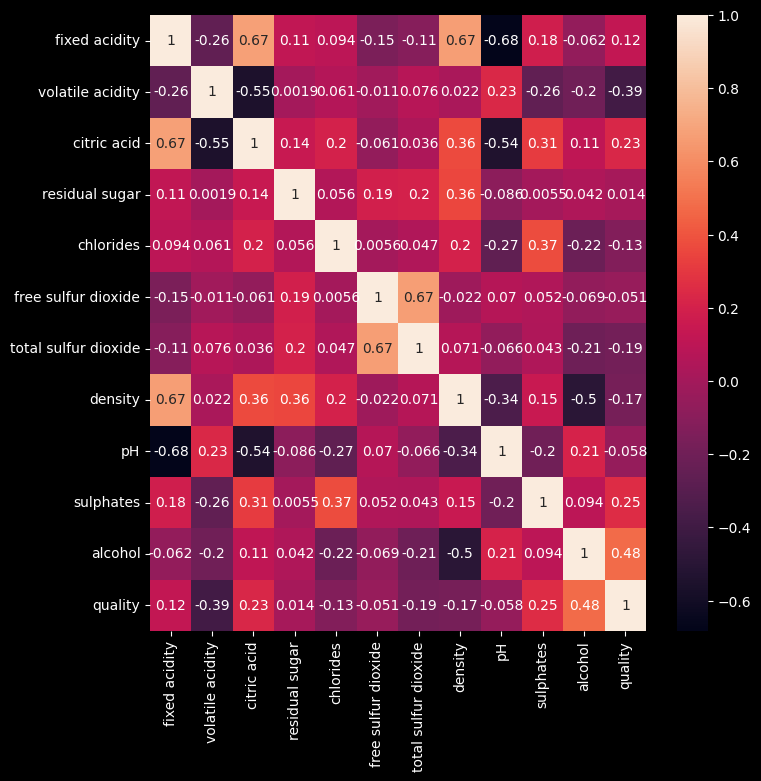

In [11]:
matrix = df.corr()
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(matrix, annot=True)
plt.show()

### We find the top 5 most correlated variables: 
1. pH vs fixed acidity
2. citric acid vs fixed acidity
3. density vs fixed acidity
4. total sulfur dioxide vs free sulfur dioxide
5. citric acid vs volatile acidity

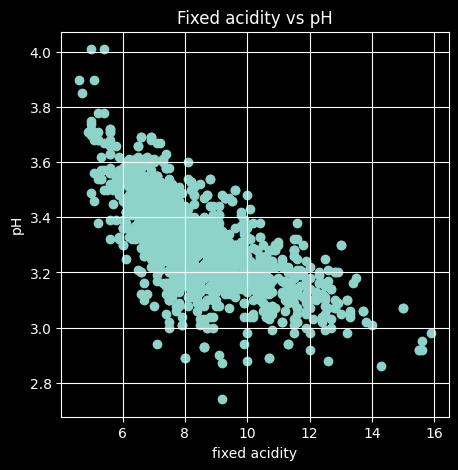

In [122]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['fixed acidity'], df['pH'])
ax.set_xlabel("fixed acidity")
ax.set_ylabel("pH")
ax.set_title("Fixed acidity vs pH")
plt.grid()
plt.show()

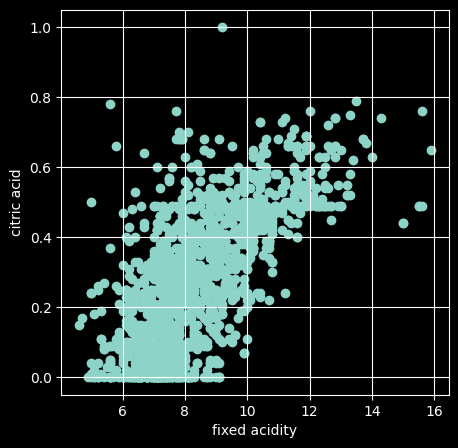

In [87]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['fixed acidity'], df['citric acid'])
ax.set_xlabel("fixed acidity")
ax.set_ylabel("citric acid")
ax.set_title("fixed acidity vs citric acid")
plt.grid()
plt.show()

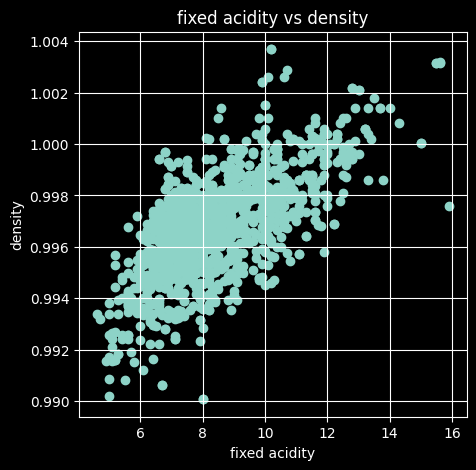

In [127]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['fixed acidity'], df['density'])
ax.set_xlabel("fixed acidity")
ax.set_ylabel("density")
ax.set_title("fixed acidity vs density")
plt.grid()
plt.show()

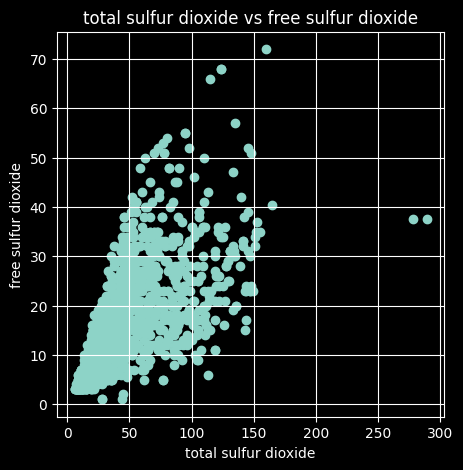

In [117]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['total sulfur dioxide'], df['free sulfur dioxide'])
ax.set_xlabel("total sulfur dioxide")
ax.set_ylabel("free sulfur dioxide")
ax.set_title("total sulfur dioxide vs free sulfur dioxide")
plt.grid()
plt.show()

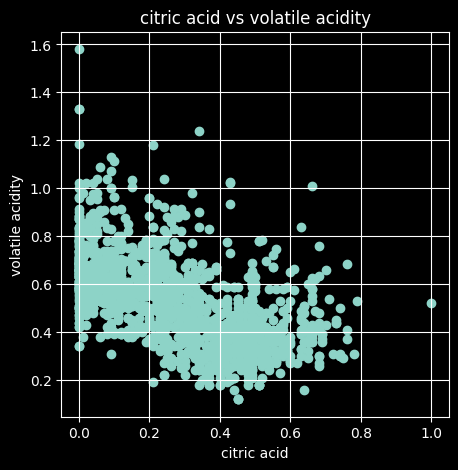

In [121]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['citric acid'], df['volatile acidity'])
ax.set_xlabel("citric acid")
ax.set_ylabel("volatile acidity")
ax.set_title("citric acid vs volatile acidity")
plt.grid()
plt.show()

In [140]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Binary Classification

In [141]:
df['quality_category'] = np.where(df['quality']>=7, 1, 0) # Good is 1, bad is zero
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression

In [143]:
train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))]) # split 80, 20

In [145]:
lr=LogisticRegression(max_iter=1000)

In [146]:
x_train1 = train.drop(['quality', 'quality_category'], axis = 1)
y_train1 = train['quality_category']

In [147]:
lr.fit(x_train1, y_train1)

LogisticRegression(max_iter=1000)

In [148]:
x_test1 = test.drop(['quality', 'quality_category'], axis = 1)
y_test1 = test['quality_category']

In [149]:
predict = lr.predict(x_test1)
predict 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [150]:
test['prediction'] = predict
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,prediction
601,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6,0,0
531,11.9,0.380,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5,0,0
804,8.4,0.520,0.22,2.7,0.084,4.0,18.0,0.99682,3.26,0.57,9.9,6,0,0
312,9.0,0.460,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,6,0,0
336,8.9,0.430,0.45,1.9,0.052,6.0,16.0,0.99480,3.35,0.70,12.5,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7,1,0
334,7.9,0.650,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,7,1,0
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.6,7,1,1
735,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5,0,0


In [151]:
print("score on test: " + str(lr.score(x_test1, y_test1)))
print("score on train: "+ str(lr.score(x_train1, y_train1)))

score on test: 0.846875
score on train: 0.8850664581704457


In [152]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['quality_category'], test['prediction'])
error

0.153125

In [153]:
test['prediction'] = test['prediction'].apply(lambda x: 'Bad' if x == 0 else 'Good')
test['quality_category'] = test['quality_category'].apply(lambda x: 'Bad' if x == 0 else 'Good')
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,prediction
601,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6,Bad,Bad
531,11.9,0.380,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5,Bad,Bad
804,8.4,0.520,0.22,2.7,0.084,4.0,18.0,0.99682,3.26,0.57,9.9,6,Bad,Bad
312,9.0,0.460,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,6,Bad,Bad
336,8.9,0.430,0.45,1.9,0.052,6.0,16.0,0.99480,3.35,0.70,12.5,6,Bad,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7,Good,Bad
334,7.9,0.650,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,7,Good,Bad
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.6,7,Good,Good
735,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5,Bad,Bad


In [154]:
df['quality_category'] = df['quality_category'].apply(lambda x: 'Bad' if x == 0 else 'Good')

# Find the trend between alcohol percentage vs quality_category

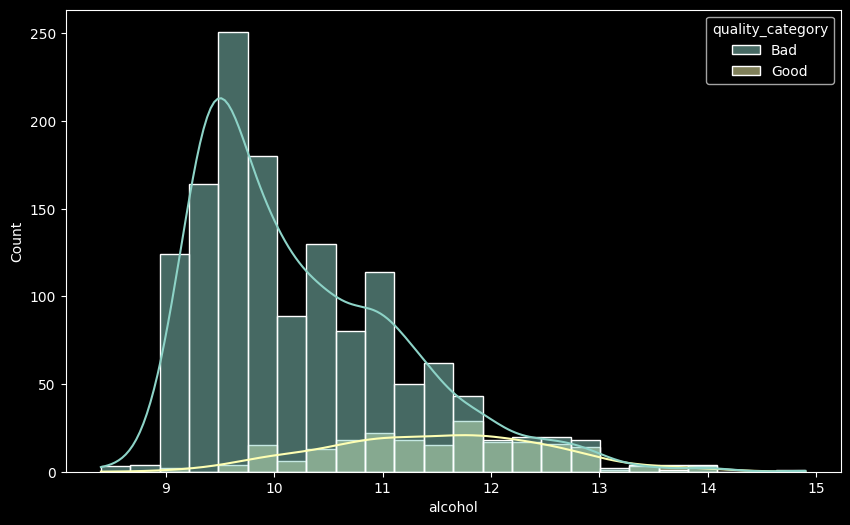

In [155]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'alcohol', kde=True, hue = 'quality_category')
plt.show()

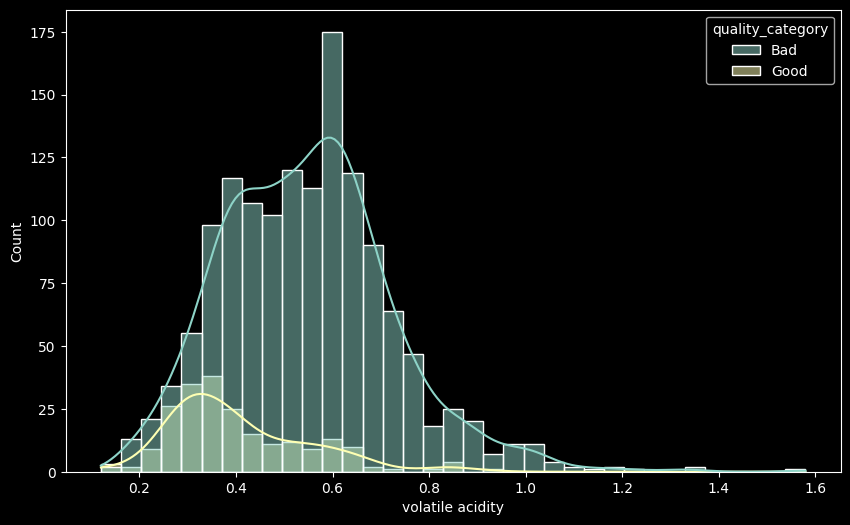

In [156]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'volatile acidity', kde=True, hue = 'quality_category')
plt.show()

# KNN Model

In [174]:
df['Rating_Category'] = pd.cut(df['quality'], bins=[3, 5, 7, 9], labels=['0', '1', '2'], right=False, include_lowest=True)

In [175]:
x_class2 = df.drop(['quality', 'quality_category', 'Rating_Category'], axis = 1)
y_class2 = df['Rating_Category']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x_class2, y_class2, test_size=0.2, random_state=42)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
ypred=knn.predict(x_test)
ypred

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '1', '2', '1', '1', '2', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [179]:
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

score on test: 0.815625
score on train: 0.8756841282251759


In [180]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

Use ANOVA f-value to find best features

In [181]:
best_feature = SelectKBest(score_func = f_classif) # use ANOVA f-value to do selection features
fit = best_feature.fit(x_class2 , y_class2)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(x_train.columns)
data = pd.concat([columns, scores], axis = 1)
data.columns = ['columns', 'scores']
data.sort_values(by = 'scores')

,columns,scores
3,residual sugar,2.323580
4,chlorides,8.259666
5,free sulfur dioxide,9.300891
8,pH,9.410306
0,fixed acidity,13.168538
7,density,18.765167
6,total sulfur dioxide,21.956997
9,sulphates,36.519975
2,citric acid,44.840551
1,volatile acidity,102.403966


In [182]:
new_x = x_class2[['alcohol','volatile acidity', 'citric acid', 'sulphates', 'total sulfur dioxide']]
new_y = y_class2 = df['Rating_Category']

In [183]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

In [184]:
knn2 = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn2.fit(x_train2, y_train2)
ypred2=knn2.predict(x_test2)
ypred2

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [185]:
print("score on test: " + str(knn2.score(x_test2, y_test2)))
print("score on train: "+ str(knn2.score(x_train2, y_train2)))

score on test: 0.81875
score on train: 0.8686473807662236


In [186]:
new_x = x_class2[['alcohol','volatile acidity', 'citric acid']]
new_y = y_class2 = df['Rating_Category']

In [187]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

In [188]:
knn3 = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn3.fit(x_train2, y_train2)
ypred2=knn3.predict(x_test2)
ypred2

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1

In [189]:
print("score on test: " + str(knn3.score(x_test2, y_test2)))
print("score on train: "+ str(knn3.score(x_train2, y_train2)))

score on test: 0.815625
score on train: 0.8600469116497264


In [190]:
from sqlalchemy import *

db_connection = create_engine(connection_url)


In [191]:
df.to_sql(
    "wine_data",
    con = db_connection,
    if_exists = "replace",
    index = False,
    chunksize = 1000
)

1599

In [192]:
%%sql
SELECT * FROM wine_data LIMIT 1;

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,Rating_Category
7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Good,2


In [193]:
%%sql
SELECT quality_category, count(*) FROM wine_data 
GROUP BY quality_category

quality_category,count(*)
Good,217
Bad,1382


In [194]:
%%sql
SELECT quality_category, AVG(pH) as pH, AVG(chlorides) as chlorides, AVG(alcohol) as 'alcohol percentage' from wine_data
group by quality_category;

quality_category,pH,chlorides,alcohol percentage
Good,3.288801846965667,0.07591244279651597,11.518049169795304
Bad,3.3146164981397637,0.0892807527751205,10.251037119438955
